In [1]:
from keras.models import load_model

classifier = load_model('/content/drive/My Drive/Internity_Project/vgg_16_saved_model.h5')

Using TensorFlow backend.


Class - Reetesh


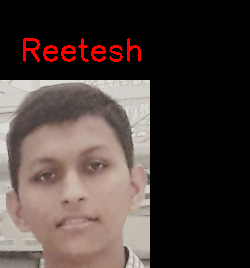

Class - Arpit


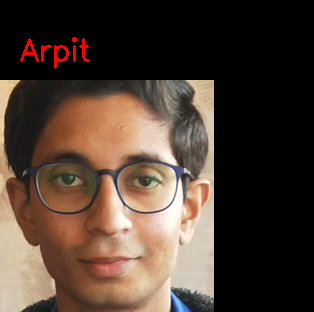

Class - Arpit


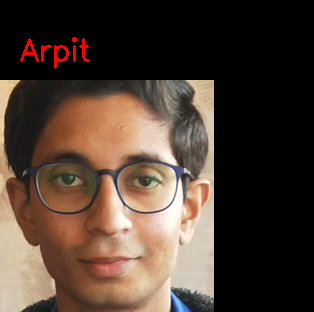

Class - Rahul


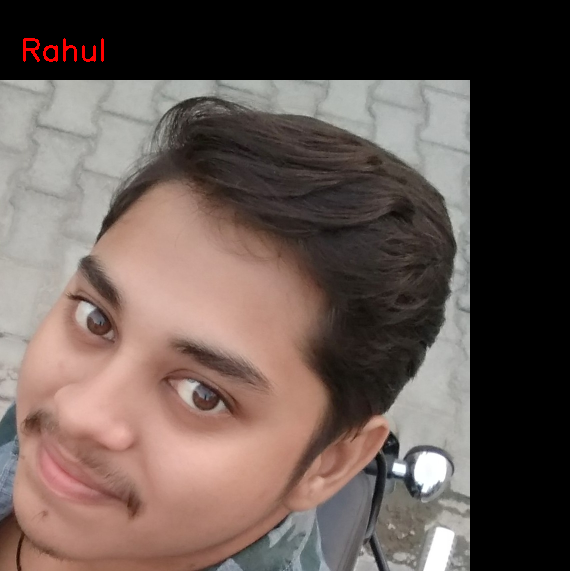

Class - Reetesh


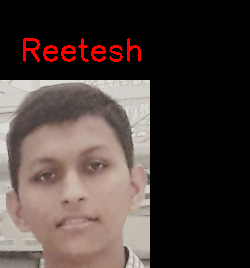

Class - Pratishtha


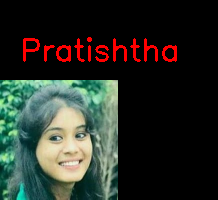

Class - Akshay 


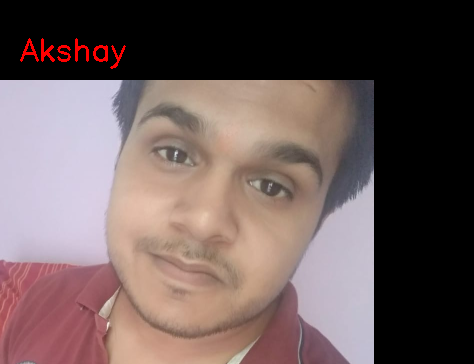

Class - Pratishtha


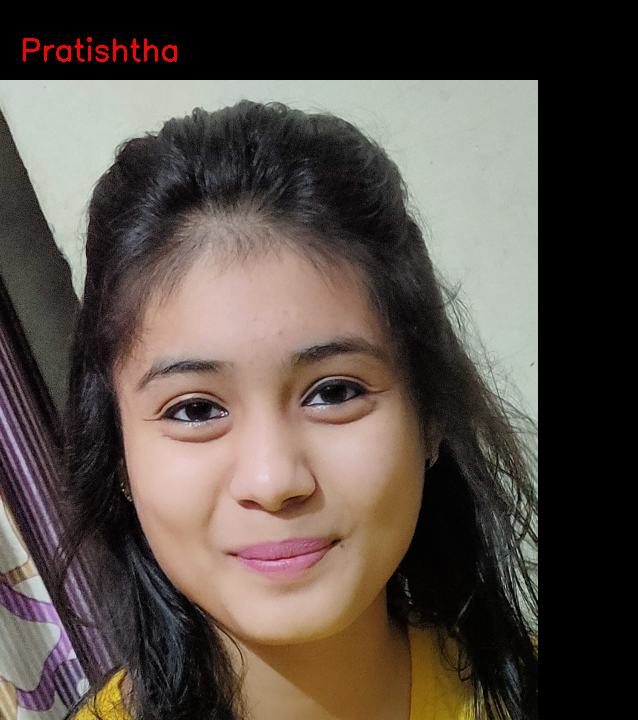

Class - Akshay 


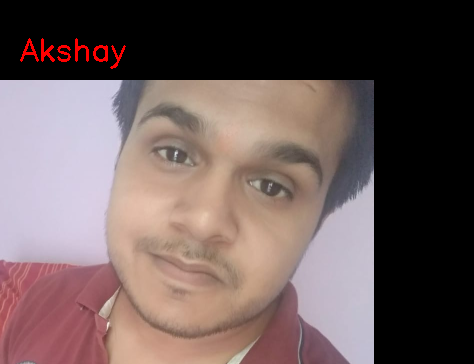

Class - Akshay 


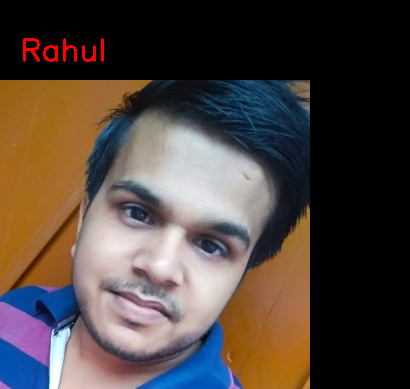

In [2]:
import os
import cv2
import numpy as np
from os import listdir
from os.path import isfile, join
from google.colab.patches import cv2_imshow


face_dict = {"[0]": "Akshay ", 
              "[1]": "Arpit",
              "[2]": "Pratishtha",
              "[3]": "Rahul",
              "[4]": "Reetesh"}

face_dict_n = {"Akshay": "Akshay ", 
              "Arpit": "Arpit",
              "Pratishtha": "Pratishtha",
              "Rahul": "Rahul",
              "Reetesh": "Reetesh"}
#Function to show the output of prediction 
def draw_test(name, pred, im):
    FACE = face_dict[str(pred)]
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(im, 80, 0, 0, 100 ,cv2.BORDER_CONSTANT,value=BLACK)
    cv2.putText(expanded_image, FACE, (20, 60) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2)
    cv2_imshow(expanded_image)

#Function to predict the randomly drawn image
def getRandomImage(path):
    """function loads a random images from a random folder in our test path """
    folders = list(filter(lambda x: os.path.isdir(os.path.join(path, x)), os.listdir(path)))
    random_directory = np.random.randint(0,len(folders))
    path_class = folders[random_directory]
    print("Class - " + face_dict_n[str(path_class)])
    file_path = path + path_class
    file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    random_file_index = np.random.randint(0,len(file_names))
    image_name = file_names[random_file_index]
    return cv2.imread(file_path+"/"+image_name) 
       
for i in range(0,10):
    input_im = getRandomImage("/content/drive/My Drive/Internity_Project/Prediction/")
    input_original = input_im.copy()
    input_original = cv2.resize(input_original, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_LINEAR)
    
    input_im = cv2.resize(input_im, (224, 224), interpolation = cv2.INTER_LINEAR)
    input_im = input_im / 255.
    input_im = input_im.reshape(1,224,224,3) 
    
    # Get Prediction
    res = np.argmax(classifier.predict(input_im, 1, verbose = 0), axis=1)
    
    # Show image with predicted class
    draw_test("Prediction", res, input_original) 
    cv2.waitKey(0)

cv2.destroyAllWindows()

